In [412]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold,learning_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from  sklearn.preprocessing import OneHotEncoder
%matplotlib inline
from datetime import datetime
import numpy as np 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [414]:
ONLINE_RETAILS = pd.read_excel(r'C:\Users\MouhamedElJai\Desktop\TD2 ML\data_folder\ONLINE_RETAILS.xlsx')


In [415]:
df1=ONLINE_RETAILS.copy()
df = pd.DataFrame(data=df1)
df['Quantity'] = df['Quantity'].abs()
df['UnitPrice']=df['UnitPrice'].replace(0,df['UnitPrice'].mean())
df = df.dropna()
df = df[['InvoiceDate', 'CustomerID','Country','InvoiceNo', 'StockCode', 'Description','Quantity','UnitPrice']]
df['montant_dépensé']=df['UnitPrice']*df['Quantity']
df

,InvoiceDate,CustomerID,Country,InvoiceNo,StockCode,Description,Quantity,UnitPrice,montant_dépensé
0,2010-12-01 08:26:00,17850.0,United Kingdom,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,2010-12-01 08:26:00,17850.0,United Kingdom,536365,71053,WHITE METAL LANTERN,6,3.39,20.34
2,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...
541904,2011-12-09 12:50:00,12680.0,France,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20
541905,2011-12-09 12:50:00,12680.0,France,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60
541906,2011-12-09 12:50:00,12680.0,France,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60
541907,2011-12-09 12:50:00,12680.0,France,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60


In [425]:
ProduitsAchète=df.groupby(['CustomerID','Country'])['Quantity']
ProduitsAchète.head(5)


0          6
1          6
2          8
3          6
4          6
          ..
541768     3
541769    24
541770    24
541771    24
541772     4
Name: Quantity, Length: 21244, dtype: int64

In [426]:
#Q1
print('meanProduitsAchète')

meanProduitsAchète=df.groupby(['CustomerID','Country'])['Quantity'].mean()
meanProduitsAchète.head(3)


meanProduitsAchète


CustomerID  Country       
12346.0     United Kingdom    74215.000000
12347.0     Iceland              13.505495
12348.0     Finland              75.516129
Name: Quantity, dtype: float64

In [427]:
print('medianProduitsAchète')
medianProduitsAchète=df.groupby(['CustomerID','Country'])['Quantity'].median()
medianProduitsAchète.head(3)

medianProduitsAchète


CustomerID  Country       
12346.0     United Kingdom    74215.0
12347.0     Iceland              12.0
12348.0     Finland              72.0
Name: Quantity, dtype: float64

ProduitsAchète


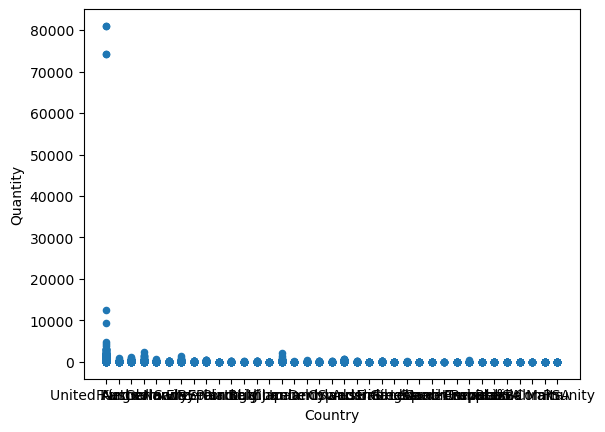

In [428]:
print('ProduitsAchète')
df.plot(x='Country', y='Quantity', kind='scatter')
plt.show()

In [429]:
#Q2
print('meanMontantDépensé')
meanMontantDépensé=df.groupby(['CustomerID','Country'])['montant_dépensé'].mean()
meanMontantDépensé.head(3)

meanMontantDépensé


CustomerID  Country       
12346.0     United Kingdom    77183.600000
12347.0     Iceland              23.681319
12348.0     Finland              57.975484
Name: montant_dépensé, dtype: float64

In [430]:
print('medianMontantDépensé')
medianMontantDépensé=df.groupby(['CustomerID','Country'])['montant_dépensé'].median()
medianMontantDépensé.head(3)

medianMontantDépensé


CustomerID  Country       
12346.0     United Kingdom    77183.60
12347.0     Iceland              17.00
12348.0     Finland              41.76
Name: montant_dépensé, dtype: float64

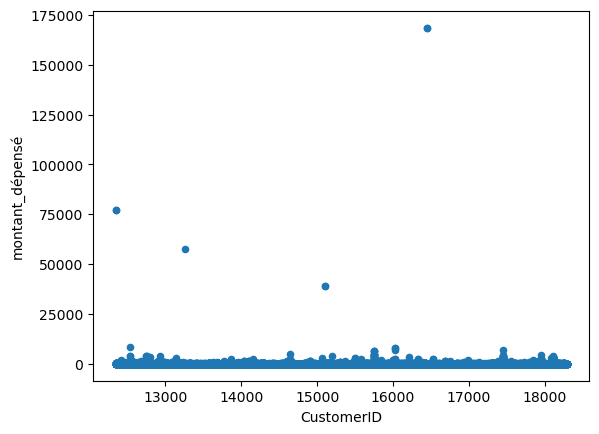

In [431]:
df.plot(x='CustomerID', y='montant_dépensé', kind='scatter')
plt.show()

In [432]:
#Q3
dfAscendingQuantity=df.sort_values(['Quantity'],ascending=False).groupby('Country').head(3)

In [433]:
print('les top-5 produits les plus vendus durant le premier trimestre 2011')
df3 = dfAscendingQuantity[(dfAscendingQuantity['InvoiceDate'] > "2011-01-01") & (dfAscendingQuantity['InvoiceDate'] < "2011-03-31")]
df3.head(5)

les top-5 produits les plus vendus durant le premier trimestre 2011


,InvoiceDate,CustomerID,Country,InvoiceNo,StockCode,Description,Quantity,UnitPrice,montant_dépensé
61619,2011-01-18 10:01:00,12346.0,United Kingdom,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,77183.60
119154,2011-03-14 13:25:00,17404.0,Sweden,546530,20975,12 PENCILS SMALL TUBE RED RETROSPOT,768,0.65,499.20
52431,2011-01-11 11:48:00,12643.0,France,540789,21381,MINI WOODEN HAPPY BIRTHDAY GARLAND,576,1.45,835.20
90868,2011-02-15 14:44:00,14935.0,Channel Islands,544073,21785,RAIN PONCHO,407,0.65,264.55
52417,2011-01-11 11:39:00,12557.0,Spain,540785,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,360,3.39,1220.40


In [434]:
print('les top-5 produits les plus vendus Pendant le second trimestre 2011')
df4 = dfAscendingQuantity[(dfAscendingQuantity['InvoiceDate'] > "2011-03-31") & (dfAscendingQuantity['InvoiceDate'] < "2011-05-31")]
df4.head(5)


les top-5 produits les plus vendus Pendant le second trimestre 2011


,InvoiceDate,CustomerID,Country,InvoiceNo,StockCode,Description,Quantity,UnitPrice,montant_dépensé
187574,2011-05-12 14:46:00,12590.0,Germany,552978,15036,ASSORTED COLOURS SILK FAN,600,0.65,390.00
174045,2011-05-04 10:47:00,17443.0,Canada,551736,37370,RETRO COFFEE MUGS ASSORTED,504,1.06,534.24
148290,2011-04-07 10:43:00,12347.0,Iceland,549222,23076,ICE CREAM SUNDAE LIP GLOSS,240,1.04,249.60
181141,2011-05-09 13:49:00,12355.0,Bahrain,552449,23076,ICE CREAM SUNDAE LIP GLOSS,96,1.25,120.00
145795,2011-04-05 08:43:00,12779.0,Poland,548909,21232,STRAWBERRY CERAMIC TRINKET BOX,72,1.06,76.32


In [435]:
#Q5 
print('les 5 pays qui ont générés le plus gros chiffre d’affaire pendant le premier trimestre 2011')
dfAscendingMontantDépensé = df.sort_values(['montant_dépensé'],ascending=False)
df31 = dfAscendingMontantDépensé[(dfAscendingMontantDépensé['InvoiceDate'] > "2011-01-01") & (dfAscendingMontantDépensé['InvoiceDate'] < "2011-03-31")]
datagroupbyCountry  = df31.groupby(['Country'])['montant_dépensé'].sum()
datagroupbyCountry.head(5)





les 5 pays qui ont générés le plus gros chiffre d’affaire pendant le premier trimestre 2011


Country
Australia          41173.77
Austria             2226.48
Belgium             6817.55
Canada               140.54
Channel Islands     6000.12
Name: montant_dépensé, dtype: float64

In [436]:
#Tracez l’évolution mensuelle du montant moyen et du montant médian d’un panier client pour chacun de ces cinq pays.
datagroupbyCountryMean=datagroupbyCountry.mean()
datagroupbyCountryMean


58760.327863598795

In [437]:
#Q6
#A quelle fréquence dépensent les 100 plus gros clients du Royaume-Uni "United Kingdom"?
dfAscendingMontantDépensé=df.sort_values(['montant_dépensé'],ascending=False).groupby('Country').head(100)
#df7=dfAscendingMontantDépensé['Country'] == 'Royaume-Uni'
df7=dfAscendingMontantDépensé[(dfAscendingMontantDépensé.Country == 'United Kingdom')]

df7

,InvoiceDate,CustomerID,Country,InvoiceNo,StockCode,Description,Quantity,UnitPrice,montant_dépensé
540421,2011-12-09 09:15:00,16446.0,United Kingdom,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.080000,168469.600000
540422,2011-12-09 09:27:00,16446.0,United Kingdom,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.080000,168469.600000
61619,2011-01-18 10:01:00,12346.0,United Kingdom,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.040000,77183.600000
61624,2011-01-18 10:17:00,12346.0,United Kingdom,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.040000,77183.600000
502122,2011-11-25 15:57:00,13256.0,United Kingdom,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,4.611114,57823.364871
...,...,...,...,...,...,...,...,...,...
202153,2011-05-24 10:24:00,17450.0,United Kingdom,554366,22702,BLACK AND WHITE CAT BOWL,888,2.400000,2131.200000
348214,2011-09-20 10:12:00,17450.0,United Kingdom,567381,22138,BAKING SET 9 PIECE RETROSPOT,416,5.100000,2121.600000
348215,2011-09-20 10:12:00,17450.0,United Kingdom,567381,22507,MEMO BOARD RETROSPOT DESIGN,416,5.100000,2121.600000
282261,2011-07-28 14:33:00,17949.0,United Kingdom,561633,22423,REGENCY CAKESTAND 3 TIER,192,10.950000,2102.400000


In [438]:
ohe = OneHotEncoder()
print(ohe)

OneHotEncoder()


In [439]:
feature_arry = ohe.fit_transform(df[["Country"]]).toarray()

In [440]:
ohe.categories_

[array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
        'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
        'European Community', 'Finland', 'France', 'Germany', 'Greece',
        'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
        'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
        'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
        'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
       dtype=object)]

In [441]:
feature_labels = ohe.categories_

In [442]:
np.array(feature_labels).ravel()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
      dtype=object)

In [443]:
feature_labels = np.array(feature_labels).ravel()

In [445]:
pd.DataFrame(feature_arry,columns=feature_labels )

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [446]:
feature = pd.DataFrame(feature_arry,columns=feature_labels )

In [448]:
pd.concat([df,feature],axis=1)

,InvoiceDate,CustomerID,Country,InvoiceNo,StockCode,Description,Quantity,UnitPrice,montant_dépensé,Australia,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,2010-12-01 08:26:00,17850.0,United Kingdom,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,15.30,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2010-12-01 08:26:00,17850.0,United Kingdom,536365,71053,WHITE METAL LANTERN,6.0,3.39,20.34,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,22.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,20.34,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,20.34,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406608,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
406609,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
406610,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
406611,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [449]:
df_new = pd.concat([df,feature],axis=1)

In [451]:
df_new = df_new.drop(columns=['InvoiceDate','InvoiceNo','StockCode','Description','Country','Australia'])

In [452]:
df_new = df_new.dropna()

In [455]:
x = df_new[df_new.columns.difference(['montant_dépensé'])]
y = df_new['montant_dépensé'].values.astype("float64")

In [456]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [457]:
regressor= LinearRegression()

In [458]:
regressor.fit(x_train,y_train)


LinearRegression()

In [461]:
predicted = regressor.predict(x_test)

In [462]:
mae= mean_absolute_error(y_test,predicted)
print(mae)

13.257101424667498


In [463]:
mse=mean_squared_error(y_test,predicted)
print(mse)

4422.478170224335


In [464]:
print(predicted)

[13.47289866 18.88646069  9.93765848 ... 13.45669872  8.4561716
 12.0019063 ]


In [465]:
dframe= pd.DataFrame({'actual':y_test.flatten(),'predicted':predicted.flatten()})

In [466]:
dframe.head(25)
print(type(dframe))

<class 'pandas.core.frame.DataFrame'>


<function matplotlib.pyplot.show(close=None, block=None)>

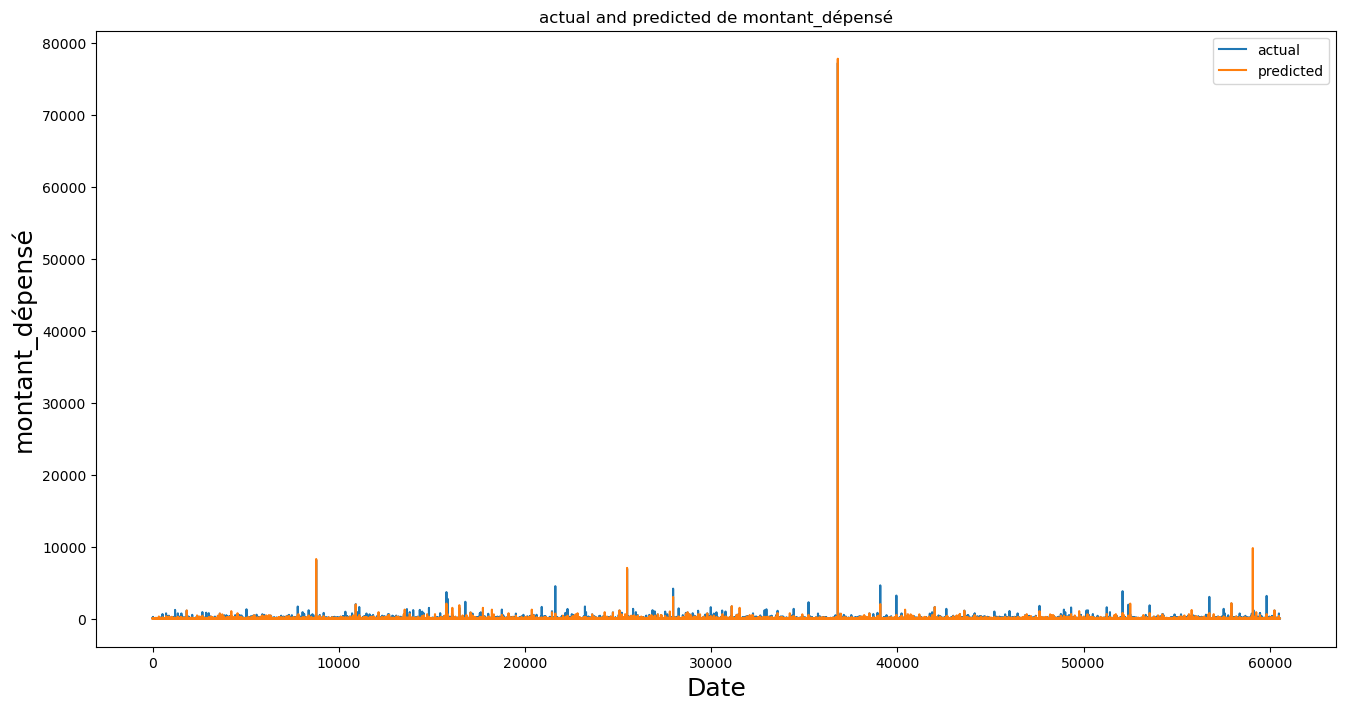

In [467]:
plt.figure(figsize=(16,8))
plt.title('actual and predicted de montant_dépensé')
plt.plot(dframe)
plt.xlabel('Date',fontsize=18)
plt.ylabel('montant_dépensé',fontsize=18)
plt.legend(['actual','predicted'])
plt.show